# Project 3: Web Scraping,  and data Analysis

## Problem Statment

web scraping iHERB website to extracting information, storing and analyzing extracted data.


## Executive Summary
*Using web scraping and beautiful soup to scrap sport product,brand names, prices,price currency,rating, and the reviews for each product.*

### Contents:
- [Web scraping](#Web_scraping)
- [Save data in dataframe](#Save_data_in_dataframe)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)


*All libraries used in this project*

In [1]:
import requests
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

## Web Scraping Data

#### Download Html page

In [2]:
request = requests.get('https://www.iherb.com/c/Sports-Nutrition?noi=192')

In [3]:
request.status_code

200

In [4]:
html = request.text

#### parsing  Beautiful Soup

In [5]:
soup = BeautifulSoup(html,'lxml')

#### lists to stor the scraped data

In [6]:
item =[]
price =[]
rating =[]
image =[]

#### Parsing data

In [7]:
items_list = []
items_list = soup.find_all('div', attrs={'class':'product-cell-container col-xs-12 col-sm-12 col-md-8 col-lg-6'})

In [8]:
items_list[0].find('a', attrs={'class':'absolute-link product-link'})['title'].split('.')

['California Gold Nutrition, Sport، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT)، 32 أوقية سائلة (946 مل)']

#### for loop to iterate through web pages
#### append the scraped data to the lists

In [9]:
for page in range(17):
    for i in items_list:
        item.append(i.find('a', attrs={'class':'absolute-link product-link'})['title'])
        price.append(i.find('span', attrs={'class':'price'}).text.strip())
        rating.append(i.find('a', attrs={'class':'stars'})['title'])

#### checking the length of the list

In [10]:
print(len(rating))

3264


## Save data in dataframe

In [11]:
df = pd.DataFrame()
df['items'] = item
df['items_prices'] = price
df['rating_score'] = rating

#### checking the head of the dataframe

In [12]:
df.head()

,items,items_prices,rating_score
0,"California Gold Nutrition, Sport، زيت الجليسري...",84.39SAR,4.4/5 - 438 تقييماتي
1,"California Gold Nutrition, مسحوق ل-جلوتامين، A...",61.37SAR,4.5/5 - 804 تقييماتي
2,"California Gold Nutrition, زيت ثلاثي الجليسريد...",38.36SAR,4.4/5 - 438 تقييماتي
3,"California Gold Nutrition, SPORT، معزول واي بر...",210.97SAR,4.4/5 - 1815 تقييماتي
4,"BSN, ألواح مقرمشة غنية بالبروتين، Protein Cris...",58.30SAR,4.5/5 - 1360 تقييماتي


In [13]:
#df.items.str.extract("([a-zA-z]+)")
#df['items'].str.extract('(\w*\s\w*)')
#df.items.str.extract('(\w*\s)')

## Data Cleaning

*removing the extras, splitting columns, adding column, and dropping columns*

In [14]:
df['items'].replace('Sport','',inplace=True, regex=True)

In [15]:
df['items'].replace('SPORT','',inplace=True, regex=True)

In [16]:
df.rating_score.replace(r'تقييماتي','',inplace=True, regex=True)

In [17]:
df.items_prices.replace('SAR','',inplace=True, regex=True)

In [18]:
df.head(2)

,items,items_prices,rating_score
0,"California Gold Nutrition, ، زيت الجليسريدات ا...",84.39,4.4/5 - 438
1,"California Gold Nutrition, مسحوق ل-جلوتامين، A...",61.37,4.5/5 - 804


#### Splitting items into two columns brand_name,and products.

In [19]:
new = df['items'].str.split(", ", n = 1, expand = True)

In [20]:
df['brand_name']= new[0] 
df['products']= new[1] 

In [21]:
df.head()

,items,items_prices,rating_score,brand_name,products
0,"California Gold Nutrition, ، زيت الجليسريدات ا...",84.39,4.4/5 - 438,California Gold Nutrition,، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT...
1,"California Gold Nutrition, مسحوق ل-جلوتامين، A...",61.37,4.5/5 - 804,California Gold Nutrition,مسحوق ل-جلوتامين، AjiPure،‏ 16 أونصة (454 جم)
2,"California Gold Nutrition, زيت ثلاثي الجليسريد...",38.36,4.4/5 - 438,California Gold Nutrition,زيت ثلاثي الجليسريد متوسط السلسلة، 12 أونصة سا...
3,"California Gold Nutrition, ، معزول واي بروتين،...",210.97,4.4/5 - 1815,California Gold Nutrition,، معزول واي بروتين، بدون نكهة، 90% بروتين، سري...
4,"BSN, ألواح مقرمشة غنية بالبروتين، Protein Cris...",58.30,4.5/5 - 1360,BSN,ألواح مقرمشة غنية بالبروتين، Protein Crisp، بط...


#### dropping items column

In [22]:
df.drop(columns =['items'], inplace = True) 

In [23]:
df.head(2)

,items_prices,rating_score,brand_name,products
0,84.39,4.4/5 - 438,California Gold Nutrition,، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT...
1,61.37,4.5/5 - 804,California Gold Nutrition,مسحوق ل-جلوتامين، AjiPure،‏ 16 أونصة (454 جم)


#### Splitting rating score into two columns rating, and reviews, the rating is out of 5.

In [24]:
new = df['rating_score'].str.split(" ", n = 1, expand = True)

In [25]:
df['rating']= new[0] 
df['reviews']= new[1] 

#### dropping rating_score column

In [26]:
df.drop(columns =['rating_score'], inplace = True) 

In [27]:
df.head(2)

,items_prices,brand_name,products,rating,reviews
0,84.39,California Gold Nutrition,، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT...,4.4/5,- 438
1,61.37,California Gold Nutrition,مسحوق ل-جلوتامين، AjiPure،‏ 16 أونصة (454 جم),4.5/5,- 804


In [28]:
df['reviews'].replace('-','',inplace=True,regex=True)

In [29]:
df.head(2)

,items_prices,brand_name,products,rating,reviews
0,84.39,California Gold Nutrition,، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT...,4.4/5,438
1,61.37,California Gold Nutrition,مسحوق ل-جلوتامين، AjiPure،‏ 16 أونصة (454 جم),4.5/5,804


#### adding new columns

In [30]:
df['prices']=df['items_prices']

In [31]:
df['currency']='SAR'

In [32]:
df.drop(columns =['items_prices'], inplace = True) 

In [33]:
df.head(2)

,brand_name,products,rating,reviews,prices,currency
0,California Gold Nutrition,، زيت الجليسريدات الثلاثية متوسطة الحلقات (MCT...,4.4/5,438,84.39,SAR
1,California Gold Nutrition,مسحوق ل-جلوتامين، AjiPure،‏ 16 أونصة (454 جم),4.5/5,804,61.37,SAR


#### changing the columns types to the right type

In [34]:
df['prices']=df['prices'].astype(float)

In [35]:
df['prices'].dtype

dtype('float64')

In [36]:
df['reviews']=df.reviews.astype(int)

In [37]:
df['reviews'].dtype

dtype('int64')

## Exploratory Data Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 6 columns):
brand_name    3264 non-null object
products      3264 non-null object
rating        3264 non-null object
reviews       3264 non-null int64
prices        3264 non-null float64
currency      3264 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 153.1+ KB


In [39]:
df.isnull().sum()

brand_name    0
products      0
rating        0
reviews       0
prices        0
currency      0
dtype: int64

In [40]:
df.shape

(3264, 6)

In [41]:
df.describe()

,reviews,prices
count,3264.000000,3264.000000
mean,756.687500,86.590573
std,1479.718278,58.738684
min,4.000000,3.840000
25%,149.250000,45.905000
50%,344.000000,67.450000
75%,776.750000,103.655000
max,9942.000000,327.930000


In [42]:
df.nunique()

brand_name     47
products      192
rating         15
reviews       156
prices        141
currency        1
dtype: int64

## Data Visualization

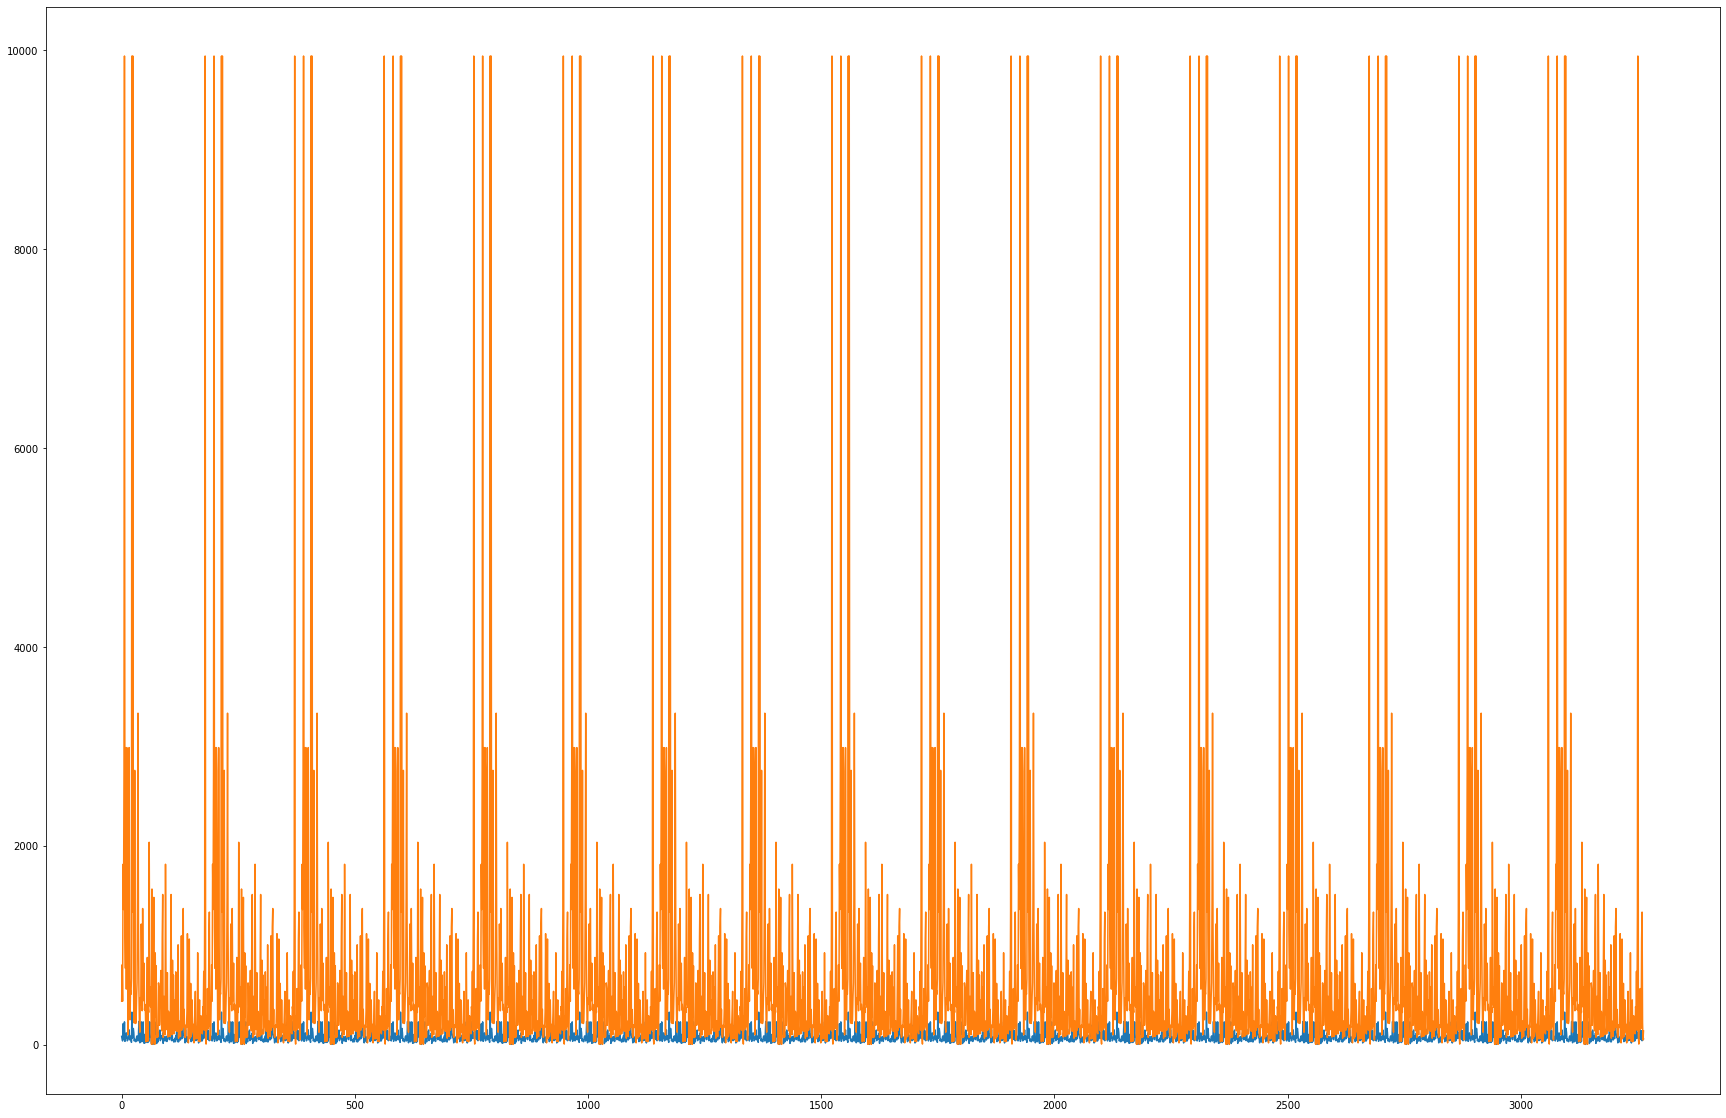

In [43]:
fig, ax =plt.subplots(figsize=(30,20))
plt.plot(df['prices']);
plt.plot(df['reviews']);


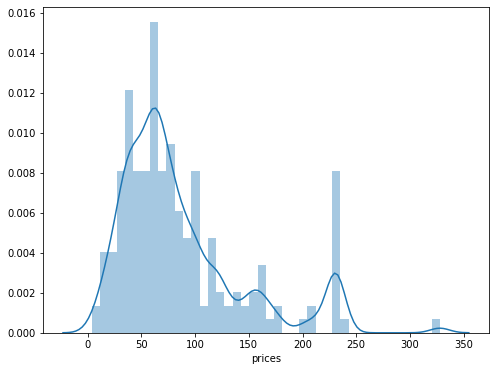

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['prices']);

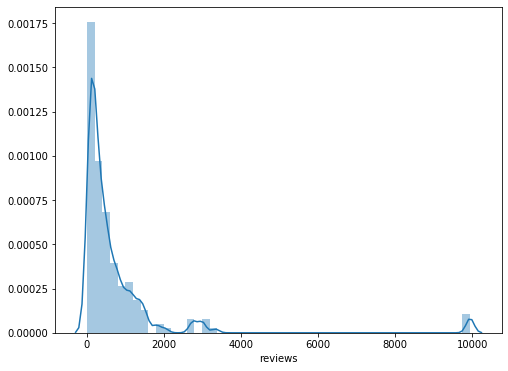

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df.reviews);

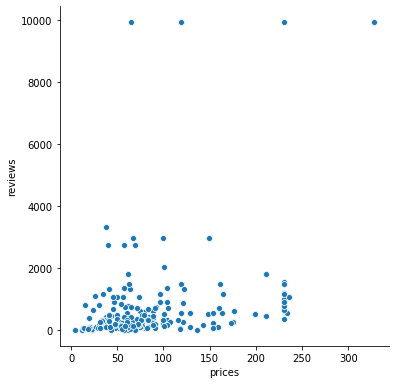

In [46]:
#df_hist= df.drop(['products','rating'], axis=1)
sns.pairplot(df,x_vars='prices',y_vars='reviews',height=5.5,);

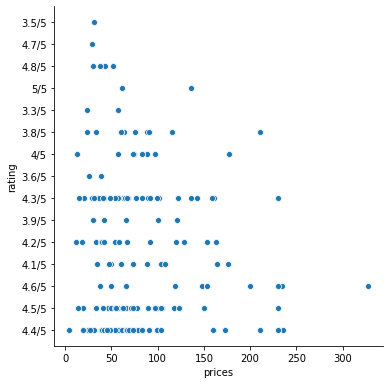

In [47]:
sns.pairplot(df,x_vars='prices',y_vars='rating',height=5.5,);

#### Outliers

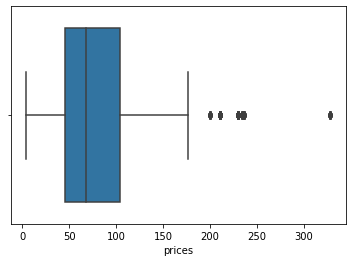

In [48]:
sns.boxplot(x='prices',data=df)
plt.show()

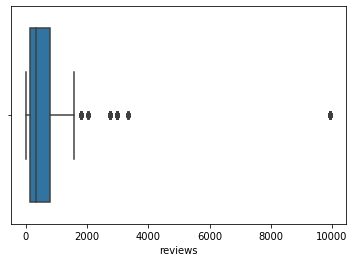

In [49]:
s = sns.boxplot(x='reviews',data=df)
plt.show()

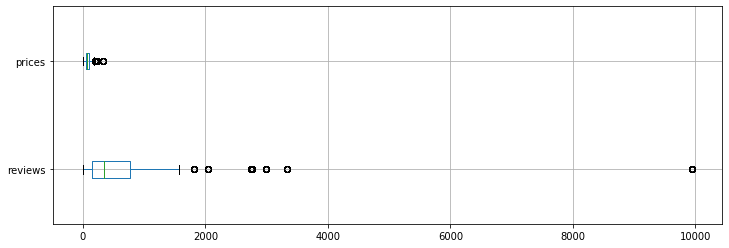

In [50]:
A = df.drop(columns=['brand_name','products','rating','currency'])
A.boxplot(vert=False,figsize=(12,4))

In [51]:
df.to_csv('iherpdata_datasets.csv')